# **Proyek Machine Learning Terapan**

Proyek System Recommendations: **Movie**
- Nama: **Luqman Hakim**
- Email: luqmanxhakim22042002@gmail.com
- Id Dicoding:2608610

# Data Loading

Upload file API kaggle

In [1]:
from google.colab import files
files.upload()  # Pilih file 'kaggle.json' yang telah diunduh

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"luqmanxhakim","key":"15f3b1854aea82ada0b6d7c6b3189972"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

upload dataset dari kaggle

In [3]:
!kaggle datasets download -d snehal1409/movielens

Dataset URL: https://www.kaggle.com/datasets/snehal1409/movielens
License(s): unknown
  0% 0.00/910k [00:00<?, ?B/s]
100% 910k/910k [00:00<00:00, 312MB/s]


In [4]:
!unzip movielens.zip

Archive:  movielens.zip
  inflating: README.txt              
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


# Data Understanding

import library

In [5]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from keras import layers
import tensorflow as tf
from tensorflow import keras

## Jumlah Data dari Masing-masing Dataset

Membaca masing-masing dataset yaitu movies.csv dan ratings.csv menggunakan library pandas dari format .csv menjadi dataframe.

In [6]:
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')

print('Jumlah data movies: ', len(movies.movieId.unique()))
print('Jumlah data ratings: ', len(ratings.userId.unique()))

Jumlah data movies:  9125
Jumlah data ratings:  671


# Univariate Exploratory Data Analysis (EDA)

## Dataset Movies

Pengecekan informasi variabel dari dataset movies yaitu jumlah kolom, nama kolom, jumlah data per kolom dan tipe datanya.

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


Menampilkan banyaknya data movies dan genrenya

In [8]:
print('Banyak data: ', len(movies.movieId.unique()))
print('Genre: ', movies.genres.unique())

Banyak data:  9125
Genre:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Documentary|IMAX' 'Children|Comedy'
 'Drama|War' 'Action|Crime|Drama' 'Action|Adventure|Fantasy'
 'Comedy|Drama|Thriller' 'Mystery|Thriller'
 'Animation|Children|Drama|Musical|Romance' 'Crime|Mystery|Thriller'
 'Adventure|Drama' 'Drama|Mystery' 'Drama|Thriller' 'Comedy|Crime'
 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller' 'Comedy|Drama'
 'Documentary' 'Action|Crime|Drama|Thriller' 'Crime|Drama|Romance'
 'Action|Adventure|Drama' 'Act

Menampilkan isi dataset movies.

In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Pengecekan deskripsi statistik dataset movies dengan fungsi describe().

In [10]:
movies.describe()

,movieId
count,9125.000000
mean,31123.291836
std,40782.633604
min,1.000000
25%,2850.000000
50%,6290.000000
75%,56274.000000
max,164979.000000


In [11]:
#Menampilkan jumlah baris dan kolom dalam dataset
movies.shape

(9125, 3)

In [12]:
# Menampilkan nilai unik pada kolom 'title'
movies.title.nunique()

9123

In [13]:
# Menampilkan nilai duplikat pada kolom 'title'
duplicate_titles = movies[movies['title'].duplicated(keep=False)]
print(duplicate_titles['title'])

2872               Hamlet (2000)
6172    War of the Worlds (2005)
7127    War of the Worlds (2005)
7151               Hamlet (2000)
Name: title, dtype: object


In [14]:
# Drop nilai duplikat pada kolom 'title'
movies.drop_duplicates(subset='title', keep='first', inplace=True)
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [15]:
# Mengubah nama kolom 'title'
movies.rename(columns={'title':'title_year'}, inplace=True)
movies

,movieId,title_year,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [16]:
# Extract kolom 'title' untuk memisahkan dengan 'year'
def extract_title(title_year):
    import re
    match = re.search(r'\((\d{4})\)$', title_year)
    if match:
        return title_year[:match.start()].strip()
    else:
        return title_year

In [17]:
def extract_year(title_year):
    if '(' in title_year and ')' in title_year:
        year = title_year.split('(')[-1].split(')')[0]
        if year.isdigit():
            return year
    return np.nan

In [18]:
# Hapus spasi di kolom 'title_year'
movies.loc[:, 'title_year'] = [val.strip() for val in movies['title_year']]

# Ekstrak kolom 'title' dan 'year' menggunakan fungsi yang telah dibuat
movies['title'] = [extract_title(val) for val in movies['title_year']]
movies['year'] = [extract_year(val) for val in movies['title_year']]

# Hapus kolom 'title_year'
del movies['title_year']

In [19]:
movies.head()

,movieId,genres,title,year
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Adventure|Children|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995


In [20]:
# Memisahkan nilai-nilai pada kolom "genres"
movies['genres'] = [genre.split('|') for genre in movies['genres']]
movies.head()

,movieId,genres,title,year
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995
1,2,"[Adventure, Children, Fantasy]",Jumanji,1995
2,3,"[Comedy, Romance]",Grumpier Old Men,1995
3,4,"[Comedy, Drama, Romance]",Waiting to Exhale,1995
4,5,[Comedy],Father of the Bride Part II,1995


Visualisasi Distribusi Genre Film

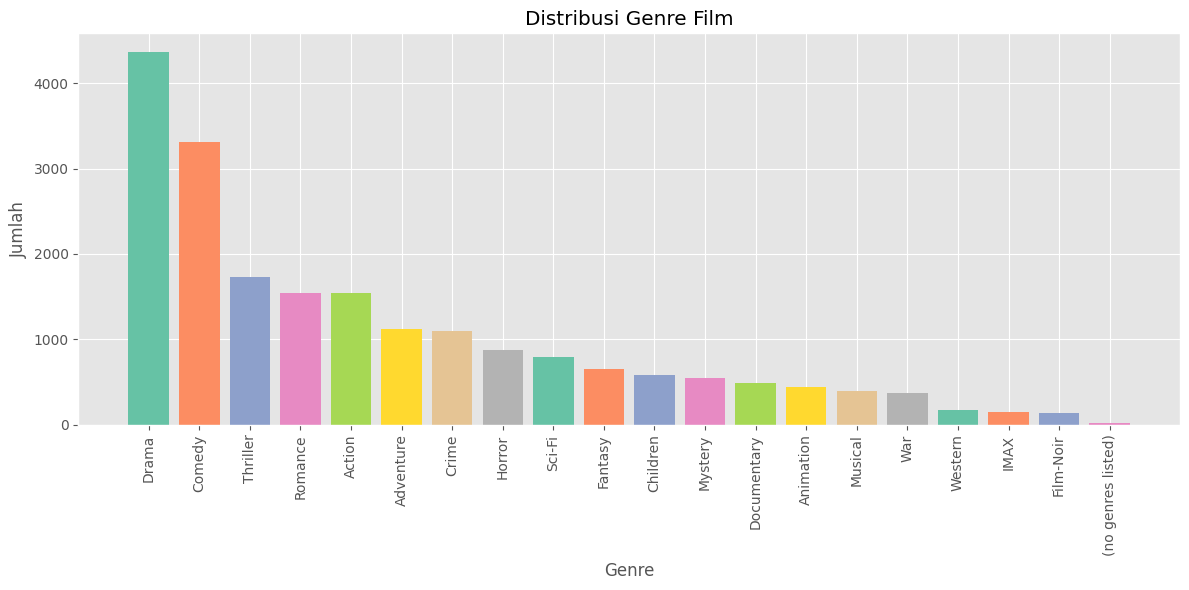

In [21]:
# Menghitung jumlah film per genre
movies2 = movies.copy()
movies2 = movies2.explode('genres')

genre_counts = movies2['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Visualisasi dengan palet dan gaya yang berbeda
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
colors = sns.color_palette("Set2", len(genre_counts))

plt.bar(genre_counts['Genre'], genre_counts['Count'], color=colors)
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.title('Distribusi Genre Film')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
# Menampilkan jumlah missing value pada dataset\
movies.isna().sum()

,0
movieId,0
genres,0
title,0
year,6


## Dataset Ratings

Pengecekan informasi variabel dari dataset ratings yaitu jumlah kolom, nama kolom, jumlah data per kolom dan tipe datanya.

In [23]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [24]:
# Menampilkan banyaknya data ratings, jumlah user, dan rating film.
print('Jumlah user: ', len(ratings.userId.unique()))
print('Jumlah rating: ', len(ratings))
print('Rating: ', ratings.rating.unique())

Jumlah user:  671
Jumlah rating:  100004
Rating:  [2.5 3.  2.  4.  3.5 1.  5.  4.5 1.5 0.5]


In [25]:
# menampilkan 5 baris pertama dari dataset "Ratings"
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [26]:
# Pengecekan deskripsi statistik dataset ratings dengan fungsi describe().
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [27]:
# Menampilkan jumlah kolom dan baris dalam dataset
ratings.shape

(100004, 4)

In [28]:
# Menampilkan data duplikat pada dataset
ratings.duplicated().sum()

np.int64(0)

In [29]:
# menampilkan jumlah missing value pada dataset
ratings.isna().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [30]:
# Drop kolom "timestamp"
ratings = ratings.drop('timestamp', axis=1)
ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [31]:
# Menampilkan nilai unik dari variable "rating"
ratings['rating'].value_counts().sort_index(ascending=True)

,count
rating,
0.5,1101
1.0,3326
1.5,1687
2.0,7271
2.5,4449
3.0,20064
3.5,10538
4.0,28750
4.5,7723


Visualisasi Rating Distribution

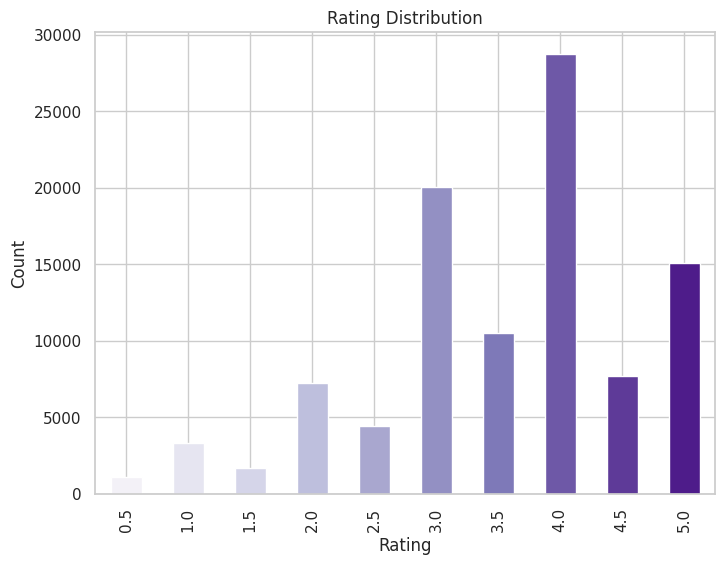

In [40]:
rating_counts = ratings['rating'].value_counts().sort_index(ascending=True)
rating_counts.plot(kind='bar', figsize=(8, 6), color=sns.color_palette("Purples", n_colors=len(rating_counts)))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

# Data Preparation

## Menggabungkan Data Movies dan Ratings

Menggabungkan dataset movies dan ratings menggunakan library Pandas merge pada kolom movieId.

In [ ]:
movie_rating = pd.merge(movies, ratings, on='movieId')
movie_rating

,movieId,genres,title,year,userId,rating
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,7,3.0
1,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,9,4.0
2,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,13,5.0
3,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,15,2.0
4,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,19,3.0
...,...,...,...,...,...,...
99997,161944,[Drama],The Last Brickmaker in America,2001,287,5.0
99998,162376,[Drama],Stranger Things,NaN,73,4.5
99999,162542,"[Romance, Thriller]",Rustom,2016,611,5.0
100000,162672,"[Adventure, Drama, Romance]",Mohenjo Daro,2016,611,3.0


Encoding "userId" menjadi index numerik

In [ ]:
user_ids = list(set(movie_rating["userId"]))
user_encoded = dict(zip(user_ids, range(len(user_ids))))
userencoded_ = {v: k for k, v in user_encoded.items()}
num_users = len(user_encoded)
num_users

671

Encoding "movieId" menjadi index numerik

In [ ]:
movie_ids = list(set(movie_rating["movieId"]))
movie_encoded = dict(zip(movie_ids, range(len(movie_ids))))
movieencoded_ = {v: k for k, v in movie_encoded.items()}
num_movies = len(movie_encoded)
num_movies

9064

In [ ]:
movie_rating = movie_rating.assign(
    user=movie_rating["userId"].apply(lambda x: user_encoded[x]),
    movie=movie_rating["movieId"].apply(lambda x: movie_encoded[x])
)

movie_rating

,movieId,genres,title,year,userId,rating,user,movie
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,7,3.0,6,0
1,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,9,4.0,8,0
2,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,13,5.0,12,0
3,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,15,2.0,14,0
4,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,19,3.0,18,0
...,...,...,...,...,...,...,...,...
99997,161944,[Drama],The Last Brickmaker in America,2001,287,5.0,286,8783
99998,162376,[Drama],Stranger Things,NaN,73,4.5,72,8850
99999,162542,"[Romance, Thriller]",Rustom,2016,611,5.0,610,8878
100000,162672,"[Adventure, Drama, Romance]",Mohenjo Daro,2016,611,3.0,610,8890


Mencari rating tertinggi dan terendah

In [ ]:
movie_rating["rating"] = movie_rating["rating"].apply(np.float32)

min_rating = movie_rating["rating"].min()
max_rating = movie_rating["rating"].max()

print(f"Number of users: {num_users}, Number of Movies: {num_movies}, Min rating: {min_rating}, Max rating: {max_rating}")

Number of users: 671, Number of Movies: 9064, Min rating: 0.5, Max rating: 5.0


Memisahkan Fitur dan Target

In [ ]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

# Acak urutan baris
movie_rating = shuffle(movie_rating, random_state=42)

# Ekstraksi fitur dan target
x = movie_rating.loc[:, ["user", "movie"]].to_numpy()

# Normalisasi rating dengan MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(movie_rating[["rating"]]).flatten()

Memisahkan data pelatihan dan data validasi

In [ ]:
train_indices = int(0.75 * movie_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

# Training Data

Membangun Model

In [ ]:
embedding_size = 50

class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            embeddings_initializer=keras.initializers.he_normal(),
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(input_dim=num_users, output_dim=1)

        self.movie_embedding = layers.Embedding(
            input_dim=num_movies,
            output_dim=embedding_size,
            embeddings_initializer=keras.initializers.he_normal(),
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(input_dim=num_movies, output_dim=1)

    def call(self, inputs):
        user_idx, movie_idx = inputs[:, 0], inputs[:, 1]

        user_vector = self.user_embedding(user_idx)
        user_bias = self.user_bias(user_idx)
        movie_vector = self.movie_embedding(movie_idx)
        movie_bias = self.movie_bias(movie_idx)

        interaction = tf.reduce_sum(user_vector * movie_vector, axis=1, keepdims=True)
        result = interaction + user_bias + movie_bias

        return tf.keras.activations.sigmoid(result)

Mendefinisikan model

In [ ]:
model = RecommenderNet(num_users, num_movies, embedding_size)

In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Training Model

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=5,
    verbose=2,
    validation_data=(x_val, y_val),
)

Epoch 1/5
1172/1172 - 13s - 11ms/step - loss: 0.6534 - root_mean_squared_error: 0.2587 - val_loss: 0.6126 - val_root_mean_squared_error: 0.2166
Epoch 2/5
1172/1172 - 20s - 17ms/step - loss: 0.5937 - root_mean_squared_error: 0.1975 - val_loss: 0.5947 - val_root_mean_squared_error: 0.1972
Epoch 3/5
1172/1172 - 11s - 9ms/step - loss: 0.5729 - root_mean_squared_error: 0.1723 - val_loss: 0.5926 - val_root_mean_squared_error: 0.1938
Epoch 4/5
1172/1172 - 21s - 18ms/step - loss: 0.5579 - root_mean_squared_error: 0.1516 - val_loss: 0.5935 - val_root_mean_squared_error: 0.1936
Epoch 5/5
1172/1172 - 11s - 10ms/step - loss: 0.5460 - root_mean_squared_error: 0.1337 - val_loss: 0.5957 - val_root_mean_squared_error: 0.1947


# Visualisasi Metrik

Plot loss dan akurasi

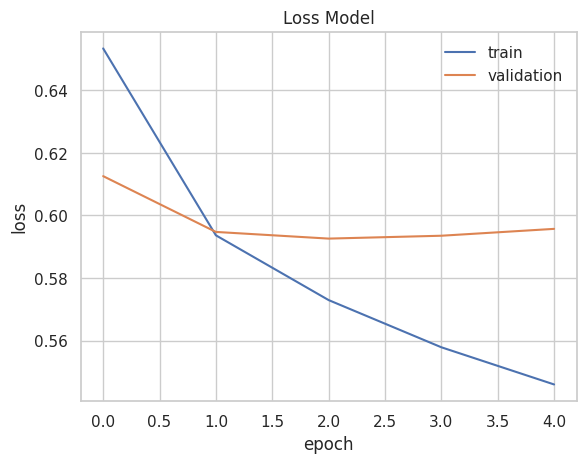

In [ ]:
fig, ax = plt.subplots()

ax.plot(history.history["loss"], label="train")
ax.plot(history.history["val_loss"], label="validation")
ax.set_title("Loss Model")
ax.set_ylabel("loss")
ax.set_xlabel("epoch")
ax.legend(loc="upper right")

plt.show()

Plot RMSE

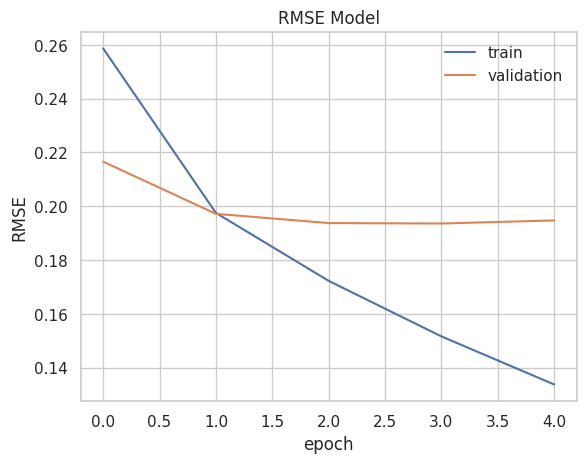

In [ ]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.title("RMSE Model")
plt.ylabel("RMSE")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper right")
plt.show()

# Modeling

Tahap pengembangan model machine learning atau modeling sistem rekomendasi dilakukan untuk memberikan hasil rekomendasi movie terbaik kepada pengguna tertentu berdasarkan rating atau penilaian pengguna terhadap movie tersebut. Tahap modeling yang dilakukan menggunakan teknik pendekatan content-based filtering recommendation dan collaborative filtering recommendation.

## Model Development - Collaborative Filtering

Top Movies

In [ ]:
user_id = movie_rating['userId'].sample(1, random_state=42).iloc[0]

movies_watched_ids = movie_rating[movie_rating['userId'] == user_id]['movieId'].values

all_movie_ids = set(movie_encoded.keys())

movies_notwatched_ids = list(all_movie_ids - set(movies_watched_ids))

user_encoder = user_encoded.get(user_id)

user_tensor = tf.constant([user_encoder] * len(movies_notwatched_ids), dtype=tf.int32)

movies_notwatched_encoded = [movie_encoded.get(movie_id) for movie_id in movies_notwatched_ids]
movie_tensor = tf.constant(movies_notwatched_encoded, dtype=tf.int32)

user_movie_array_tf = tf.stack([user_tensor, movie_tensor], axis=1)

ratings_tf = model.predict(user_movie_array_tf).flatten()

top_ratings_indices = np.argsort(ratings_tf)[-10:][::-1]

recommended_movie_ids = [
    movieencoded_.get(movies_notwatched_encoded[index]) for index in top_ratings_indices
]

print("Tampilkan Rekomendasi Film untuk {} Penonton ".format(num_users))

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Tampilkan Rekomendasi Film untuk 671 Penonton 


5 Film dengan rating tertinggi

In [ ]:
print("====" * 9)

print("Top 5 Film dengan Rating Tertinggi")

print("====" * 9)

user_watched_movies = movie_rating[movie_rating['userId'] == user_id].drop_duplicates(subset=['movieId'])

top_movies_user = user_watched_movies.sort_values(by="rating", ascending=False).head(5)

for index, row in top_movies_user.iterrows():
    print(row.title, ":", row.genres)

Top 5 Film dengan Rating Tertinggi
Planet of the Apes : ['Action', 'Drama', 'Sci-Fi']
Name of the Rose, The (Name der Rose, Der) : ['Crime', 'Drama', 'Mystery', 'Thriller']
Crimson Tide : ['Drama', 'Thriller', 'War']
Boot, Das (Boat, The) : ['Action', 'Drama', 'War']
Empire of the Sun : ['Action', 'Adventure', 'Drama', 'War']


Top 10 Rekomendasi Film

In [ ]:
print("====" * 6)

print("Top 10 Rekomendasi Film")

print("====" * 6)

recommended_movie_ids = []
for x in top_ratings_indices:
    encoded_movie_id = movies_notwatched_encoded[x]
    movie_id = movieencoded_.get(encoded_movie_id)
    if movie_id not in recommended_movie_ids:
        recommended_movie_ids.append(movie_id)

movie_rating_unique = movie_rating.drop_duplicates(subset="movieId")
recommended_movies = movie_rating_unique[movie_rating_unique["movieId"].isin(recommended_movie_ids)].head(10)
for index, row in recommended_movies.iterrows():
    print(row.title, ":", row.genres)

Top 10 Rekomendasi Film
Pulp Fiction : ['Comedy', 'Crime', 'Drama', 'Thriller']
Cool Hand Luke : ['Drama']
African Queen, The : ['Adventure', 'Comedy', 'Romance', 'War']
Godfather, The : ['Crime', 'Drama']
Shawshank Redemption, The : ['Crime', 'Drama']
Misérables, Les : ['Drama', 'War']
Killing Fields, The : ['Drama', 'War']
Best Years of Our Lives, The : ['Drama', 'War']
It Happened One Night : ['Comedy', 'Romance']
Band of Brothers : ['Action', 'Drama', 'War']


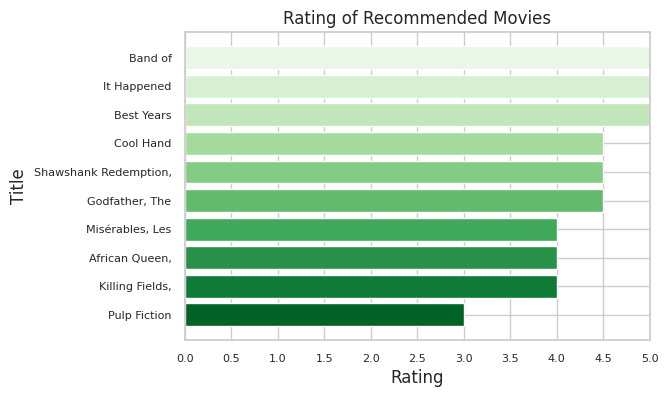

In [ ]:
recommended_movies_sorted = recommended_movies.sort_values(by='rating', ascending=False)

titles = recommended_movies_sorted['title']
ratings = recommended_movies_sorted['rating']

palette = sns.color_palette("Greens", n_colors=len(titles))

plt.figure(figsize=(6, 4))

plt.barh(titles, ratings, color=palette)

plt.xlabel('Rating', fontsize=12)
plt.ylabel('Title', fontsize=12)
plt.title('Rating of Recommended Movies')

# Invert the y-axis
plt.gca().invert_yaxis()

plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.5, 0.5), fontsize=8)

y_axis_labels = [' '.join(title.split()[:2]) for title in titles]
plt.yticks(range(len(titles)), y_axis_labels, fontsize=8)

plt.show()

## Model Development - Content Based Filtering

membuat pivot table untuk menggabungkan pengguna yang memberikan rating dan jumlah film yang mendapat rating

In [ ]:
no_user_voted = movie_rating.groupby('movieId')['rating'].agg('count')
no_movies_voted = movie_rating.groupby('userId')['rating'].agg('count')

final_dataset = movie_rating.pivot(index='movieId',columns='userId',values='rating')
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


visualisasi jumlah pengguna yang memberikan rating dengan threshold = 10

In [ ]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.5,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


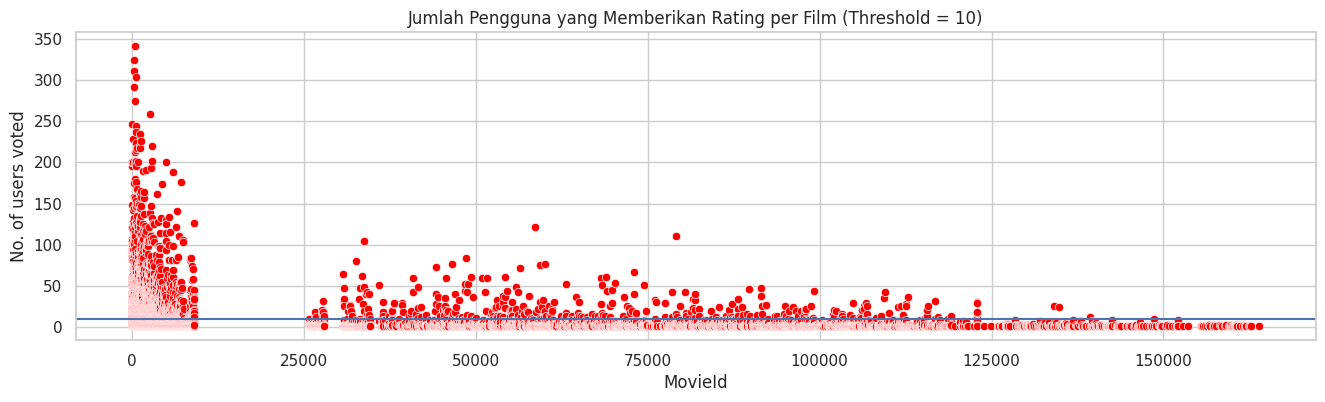

In [ ]:
sns.set(style="whitegrid")

f, ax = plt.subplots(1, 1, figsize=(16, 4))

# Convert the Series to a DataFrame with column names 'MovieId' and 'No_of_users_voted'
no_user_voted_df = no_user_voted.reset_index()
no_user_voted_df.columns = ['MovieId', 'No_of_users_voted']

# Use the DataFrame as the data source and the column names for x and y
sns.scatterplot(data=no_user_voted_df, x='MovieId', y='No_of_users_voted', color='red')

plt.axhline(y=10, color='b')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.title('Jumlah Pengguna yang Memberikan Rating per Film (Threshold = 10)')
plt.show()

visualisasi jumlah pemberian rating oleh setiap pengguna dengan threshold = 50

In [ ]:
final_dataset = final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,2,3,4,5,7,8,12,13,15,17,...,655,656,658,659,660,662,664,665,667,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2.5,0.0,3.5,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0
122904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


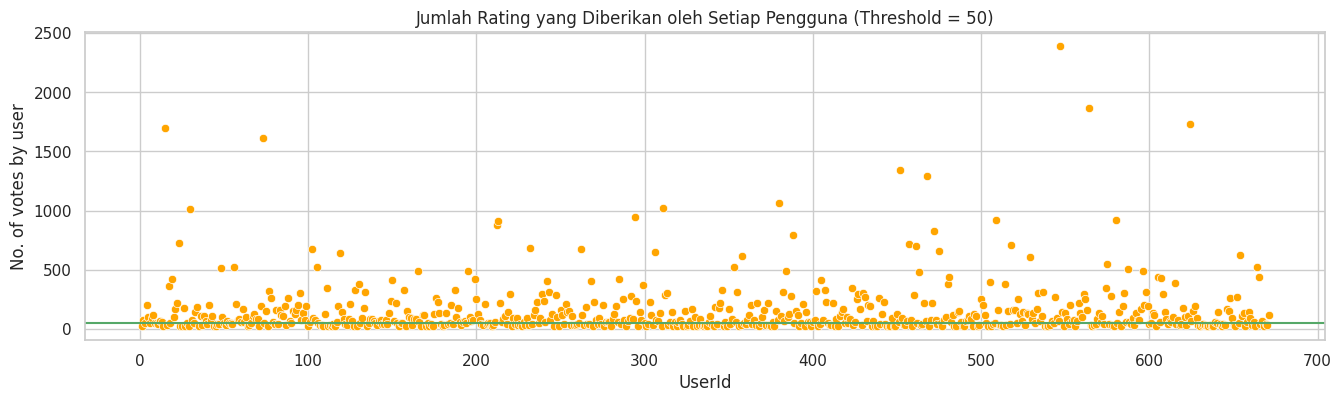

In [ ]:
sns.set(style="whitegrid")

f, ax = plt.subplots(1, 1, figsize=(16, 4))

# Convert the Series to a DataFrame with column names 'UserId' and 'No_of_votes_by_user'
no_movies_voted_df = no_movies_voted.reset_index()
no_movies_voted_df.columns = ['UserId', 'No_of_votes_by_user']

# Use the DataFrame as the data source and the column names for x and y
sns.scatterplot(data=no_movies_voted_df, x='UserId', y='No_of_votes_by_user', color='orange')

plt.axhline(y=50, color='g')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.title('Jumlah Rating yang Diberikan oleh Setiap Pengguna (Threshold = 50)')
plt.show()

menggunakan algoritma KNN

In [ ]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=30, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=30)

In [ ]:
def recommend_movies_by_title(query_title):
    top_n = 10
    matched_movies = movie_rating[movie_rating['title'].str.contains(query_title, case=False, na=False)]

    if not matched_movies.empty:
        target_movie_id = matched_movies.iloc[0]['movieId']
        target_index = final_dataset.index[final_dataset['movieId'] == target_movie_id][0]

        distances, indices = knn.kneighbors(csr_data[target_index], n_neighbors=top_n + 1)

        recommendations = []
        for idx, dist in sorted(zip(indices.flatten(), distances.flatten()), key=lambda x: x[1])[1:]:
            rec_movie_id = final_dataset.iloc[idx]['movieId']
            movie_info = movie_rating[movie_rating['movieId'] == rec_movie_id].iloc[0]
            recommendations.append({
                'Title': movie_info['title'],
                'Genres': movie_info['genres'],
                'Rating': movie_info['rating']
            })

        return pd.DataFrame(recommendations, index=range(1, top_n + 1))

    return "No movies found. Please check your input"

rekomendasi film sesuai user input

In [ ]:
rec = recommend_movies_by_title('Ant-Man')
rec

,Title,Genres,Rating
1,Man of Steel,"[Action, Adventure, Fantasy, Sci-Fi, IMAX]",3.0
2,Pacific Rim,"[Action, Adventure, Sci-Fi, IMAX]",2.0
3,Avengers: Age of Ultron,"[Action, Adventure, Sci-Fi]",3.5
4,Oblivion,"[Action, Adventure, Sci-Fi, IMAX]",4.0
5,Edge of Tomorrow,"[Action, Sci-Fi, IMAX]",3.0
6,Captain America: The First Avenger,"[Action, Adventure, Sci-Fi, Thriller, War]",4.0
7,Iron Man 2,"[Action, Adventure, Sci-Fi, Thriller, IMAX]",4.5
8,World War Z,"[Action, Drama, Horror, IMAX]",3.0
9,Captain America: The Winter Soldier,"[Action, Adventure, Sci-Fi, IMAX]",4.0
10,Thor,"[Action, Adventure, Drama, Fantasy, IMAX]",3.5


menghitung precision score

In [ ]:
movie_relevant = 10
movie_recommendation = len(rec)
precision_score = movie_relevant / movie_recommendation

print("Precision: {:.2f}".format(precision_score))

Precision: 1.00
